In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation 
import numpy as np
import matplotlib.image as mgimg
from matplotlib import animation
from IPython.display import HTML

In [ ]:
def x_npo_array(x_0, r, n):
    
    a = []
    i = 0
    
    while(i<n+2):
        if(i==0):
            x_npo = 4*r*x_0*(1 - x_0)
            x_n = x_npo
            a.append(x_n)
            i += 1

        elif(i<n+1):
            x_npo = 4*r*x_n*(1 - x_n)
            x_n = x_npo
            a.append(x_n)
            i += 1
            
        elif(i>=n+1):
            i+=1
             
    return(a)

In [ ]:
def x_npo_array_R_array(r_i,r_n,z):

    r = np.arange(r_i,r_n,z)
    b = []
    i = 0
    
    while(i<len(r)):
        a = x_npo_array(0.65, r[i] ,100)
        b.append(a)
        i += 1
        
        
    return b

In [ ]:
def x_nth_array(r_i,r_n,z,n):
    
    b = x_npo_array_R_array(r_i,r_n,z)
    r = np.arange(r_i,r_n,z)
    x_n = []
    i = 0
    
    while(i<len(r)):
        x_n.append(b[i][n])
        i += 1 
    
    return x_n

In [ ]:

def lyupanov(z,x,r): # l (L) is Lyupanov exponent
    
    ly=[]  #makes empty array to be filled with l values
    i = 0
    n = len(x)  # how many elements x
    
    while(i<n):   #n being the number of x values per r
        if(i==0):
            t = 4*r*(1-(2*x[z][i]))
            l_0 = 0.5*np.log(np.fabs(t))
            i += 1   #iterates
        
        elif(i<n-1):
            t = 4*r*(1-(2*x[z][i]))
            l = l_0 + 0.5*np.log(np.fabs(t))
            l_0 = l   #defines the new l as l_0 so that we can plug it in summation above.
                #gets the next x value with 
            i += 1 
        else:
            i += 1
            
        # find a way to return array with each l value for corresponding to each r
    return l_0

In [ ]:
def r_loop():
    x = x_npo_array_R_array(0.7,1.0,.01)
    r = np.arange(0.7,1.0,.01)
    l_y = []
    i = 0 
    z = 0
    
    while(i<len(r)): 
        l_y.append(lyupanov(z,x,r[i]))
        i += 1 
        z += 1
        
    return l_y

In [ ]:
f, axarr = plt.subplots(1, 2)
f.subplots_adjust(wspace=0.4)
f.set_figheight(7)
f.set_figwidth(17)

b = x_npo_array_R_array(0.7,1.0,0.01)
i = 0

l_y = r_loop()
x_n = x_nth_array(0.7,1.0,0.01,100)
r = np.arange(0.7,1.0,.01)

#first panel - x_npo
while(i<len(b[0])-1):
    axarr[0].plot(r[0:31],x_nth_array(0.7,1.0,0.01,i),'.',color='red')
    i += 1
axarr[0].set_xlabel('r')
axarr[0].set_ylabel('x_n')
axarr[0].set_title('$x_n\ values$', position=(0.5,1.07))

#second panel - ly
axarr[1].plot(r, l_y)
axarr[1].set_xlabel('r')
axarr[1].set_ylabel('ly')
axarr[1].set_title('$ly\ values$',position=(0.5,1.07))

In [ ]:
b = x_npo_array_R_array(.7,1.0,0.01)
i = 0
while(i<len(b[1])):
    x = i
    y = b[20][i]
    plt.plot(x,y,'o')
    i+=1

In [ ]:
def animate(i):
    l.set_data(t[:i], x[:i])

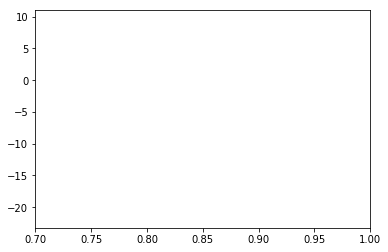

In [191]:
#animation r vs l_y

l_y = r_loop()
x_n = x_nth_array(0.7,1.0,0.01,100)
r = np.arange(0.7,1.0,.01)

t = r
x = l_y

fig, ax = plt.subplots()
ax.axis([0.7,1.0,l_y[11],11])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

HTML(ani.to_jshtml())

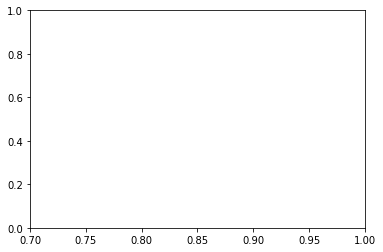

In [202]:
#animation x vs x_n

l_y = r_loop()
x_n = x_nth_array(0.7,1.0,0.01,100)
r = np.arange(0.7,1.0,.01)
b = x_npo_array_R_array(0.7,1.0,0.01)


t = r
x = x_nth_array(0.7,1.0,0.01,100)
x1 = x_nth_array(0.7,1.0,0.01,99)


fig, ax = plt.subplots()
ax.axis([0.7,1.0,0.0,1.0])
l, = ax.plot([],[])
g, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])
    g.set_data(t[:i], x1[:i])



ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))



HTML(ani.to_jshtml())


TypeError: 'AxesSubplot' object does not support indexing

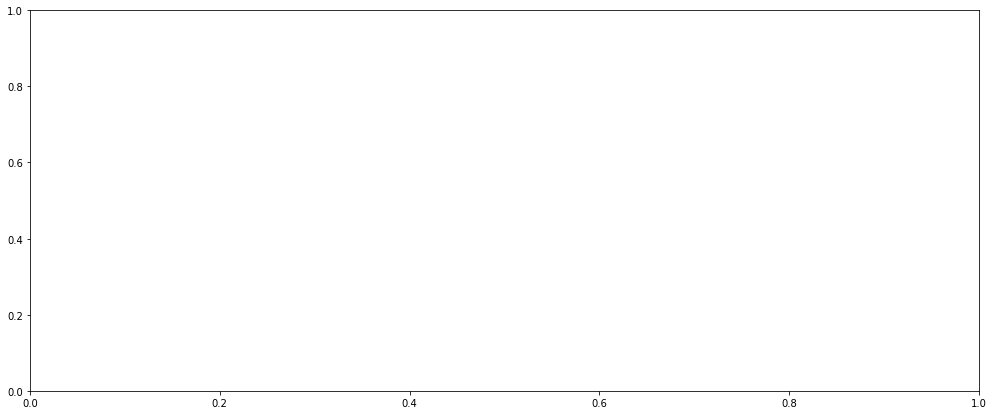

In [197]:
f, axarr = plt.subplots()
f.subplots_adjust(wspace=0.4)
f.set_figheight(7)
f.set_figwidth(17)

l_y = r_loop()
x_n = x_nth_array(0.7,1.0,0.01,100)
r = np.arange(0.7,1.0,.01)
b = x_npo_array_R_array(0.7,1.0,0.01)
i = 0




plot(r[0:31],x_nth_array(0.7,1.0,0.01,90),'.',color='red')

set_xlabel('r')
set_ylabel('x_n')
set_title('$x_n\ values$', position=(0.5,1.07))